# DOTA 2 EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('./data/dota2_matches.parquet')

df.head()

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
0,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915196,BEST_OF_THREE,7988517842,2024-10-15 01:28:24,...,108,Underlord,POSITION_3,OFF_LANE,CORE,8,8,12,19449,177
1,Royal Circuit #3,17064,PROFESSIONAL,2024-10-01 05:00:00,2024-10-31 05:00:00,<NA>,915178,BEST_OF_THREE,7988515816,2024-10-15 01:24:03,...,20,Vengeful Spirit,POSITION_5,SAFE_LANE,HARD_SUPPORT,1,7,13,7981,177
2,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915196,BEST_OF_THREE,7988495156,2024-10-15 00:43:58,...,14,Pudge,POSITION_5,SAFE_LANE,HARD_SUPPORT,2,4,10,10220,177
3,Royal Circuit #3,17064,PROFESSIONAL,2024-10-01 05:00:00,2024-10-31 05:00:00,<NA>,915178,BEST_OF_THREE,7988474098,2024-10-15 00:01:33,...,83,Treant Protector,POSITION_5,SAFE_LANE,HARD_SUPPORT,3,2,29,9250,177
4,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915166,BEST_OF_THREE,7988466451,2024-10-14 23:44:45,...,138,Muerta,POSITION_4,OFF_LANE,LIGHT_SUPPORT,6,5,13,15004,177


In [4]:
# Resetea las opciones más comunes que causan lentitud al valor predeterminado (from ai studio)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_info_columns')

print("Configuración de filas máximas restaurada a:", pd.get_option('display.max_rows'))
print("Configuración de columnas máximas restaurada a:", pd.get_option('display.max_columns'))

Configuración de filas máximas restaurada a: 60
Configuración de columnas máximas restaurada a: 20


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193773 entries, 0 to 193772
Data columns (total 130 columns):
 #    Column                     Dtype         
---   ------                     -----         
 0    league                     string        
 1    league_id                  int32[pyarrow]
 2    league_tier                string        
 3    league_start_date_time     datetime64[ns]
 4    league_end_date_time       datetime64[ns]
 5    league_region              string        
 6    series_id                  int32[pyarrow]
 7    series_type                string        
 8    match_id                   int64[pyarrow]
 9    match_start_date_time      datetime64[ns]
 10   match_duration_seconds     int32[pyarrow]
 11   first_blood_time_seconds   int32[pyarrow]
 12   radiant_team_id            int64[pyarrow]
 13   radiant_team_name          string        
 14   dire_team_id               int64[pyarrow]
 15   dire_team_name             string        
 16   winner_id         

### Changethe pyarrow format to basic

In [6]:
df = df.convert_dtypes(dtype_backend="numpy_nullable")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193773 entries, 0 to 193772
Data columns (total 130 columns):
 #    Column                     Dtype         
---   ------                     -----         
 0    league                     string        
 1    league_id                  Int32         
 2    league_tier                string        
 3    league_start_date_time     datetime64[ns]
 4    league_end_date_time       datetime64[ns]
 5    league_region              string        
 6    series_id                  Int32         
 7    series_type                string        
 8    match_id                   Int64         
 9    match_start_date_time      datetime64[ns]
 10   match_duration_seconds     Int32         
 11   first_blood_time_seconds   Int32         
 12   radiant_team_id            Int64         
 13   radiant_team_name          string        
 14   dire_team_id               Int64         
 15   dire_team_name             string        
 16   winner_id         

### Check null values

In [7]:
df.isna().sum().sort_values(ascending=False)

dire_kills                   120873
radiant_kills                120873
dire_player_3_networth        82084
dire_player_2_networth        82084
radiant_player_1_networth     82084
                              ...  
league_tier                       0
radiant_player_1_hero_id          0
radiant_player_1_assists          0
series_id                         0
match_start_date_time             0
Length: 130, dtype: int64

In [8]:
np.array(df.columns)

array(['league', 'league_id', 'league_tier', 'league_start_date_time',
       'league_end_date_time', 'league_region', 'series_id',
       'series_type', 'match_id', 'match_start_date_time',
       'match_duration_seconds', 'first_blood_time_seconds',
       'radiant_team_id', 'radiant_team_name', 'dire_team_id',
       'dire_team_name', 'winner_id', 'radiant_kills', 'dire_kills',
       'radiant_player_1_id', 'radiant_player_1_name',
       'radiant_player_1_hero_id', 'radiant_player_1_hero',
       'radiant_player_1_position', 'radiant_player_1_lane',
       'radiant_player_1_role', 'radiant_player_1_kills',
       'radiant_player_1_deaths', 'radiant_player_1_assists',
       'radiant_player_1_networth', 'radiant_player_2_id',
       'radiant_player_2_name', 'radiant_player_2_hero_id',
       'radiant_player_2_hero', 'radiant_player_2_position',
       'radiant_player_2_lane', 'radiant_player_2_role',
       'radiant_player_2_kills', 'radiant_player_2_deaths',
       'radiant_player_

## Identify null values

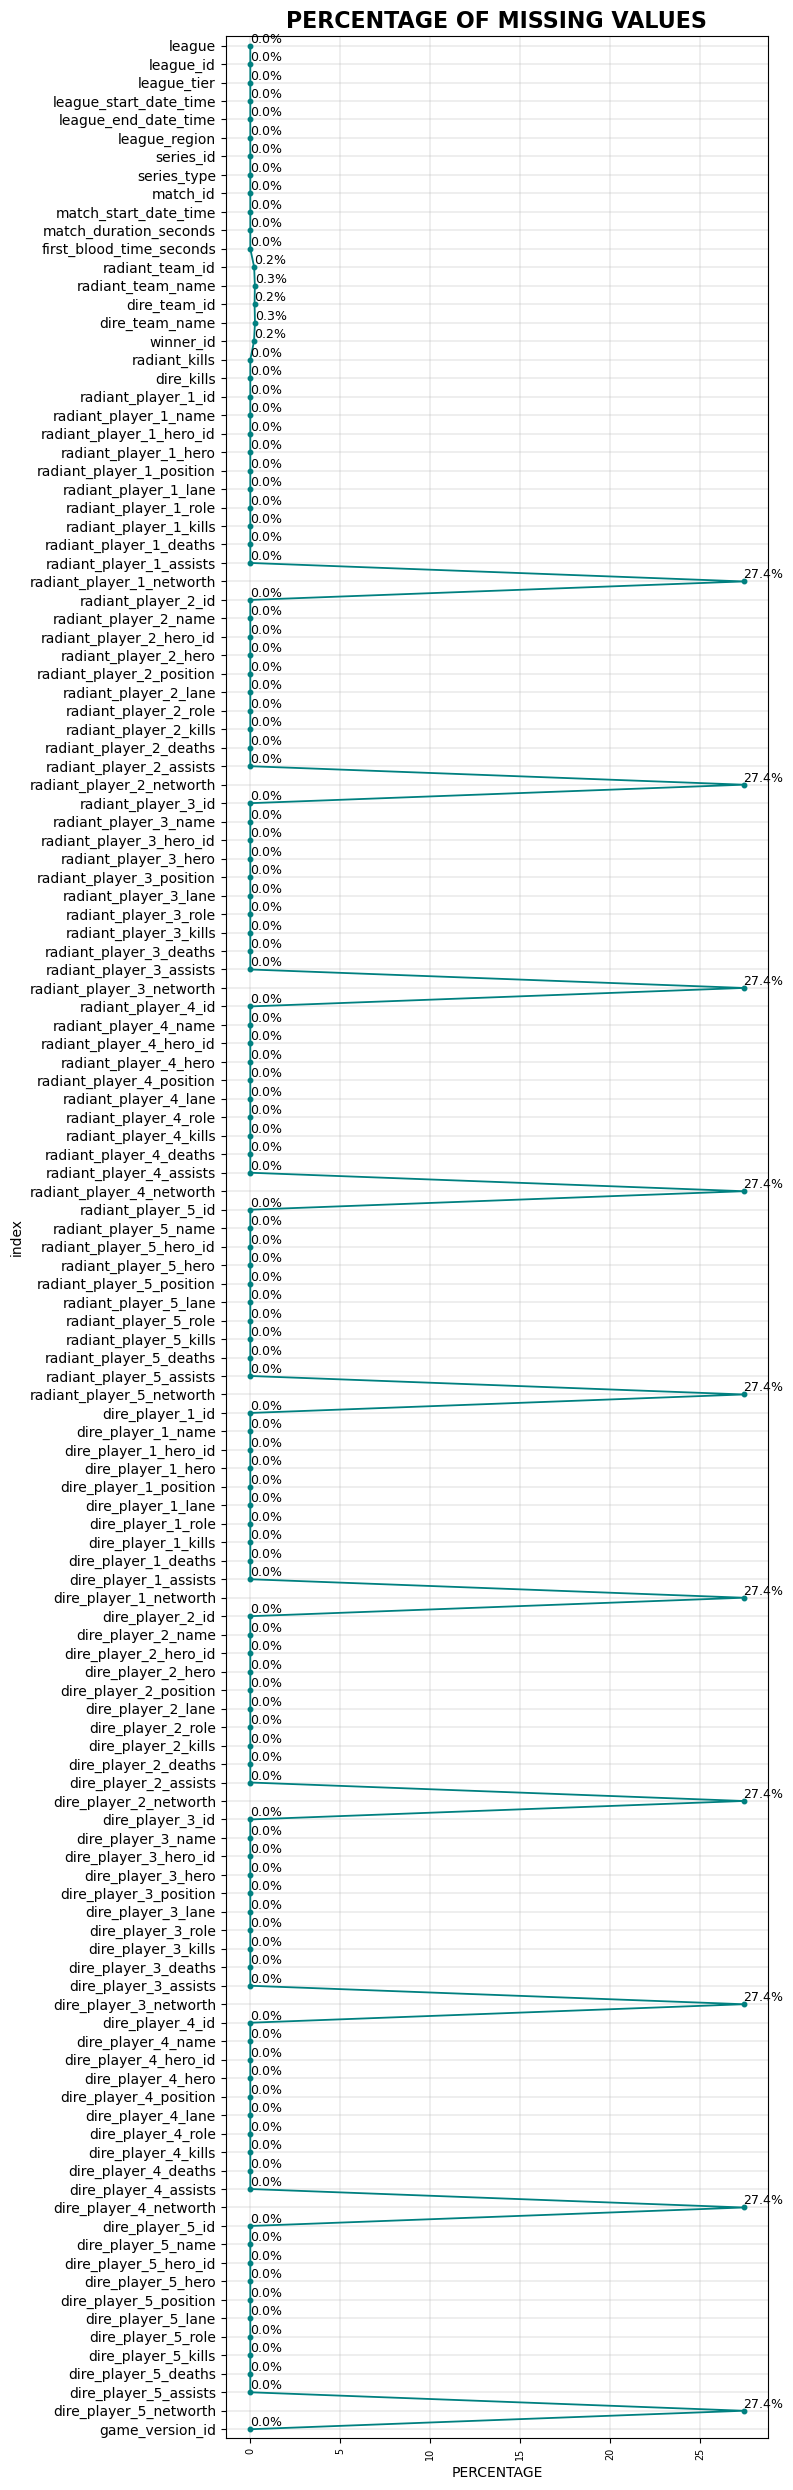

In [213]:
# Verify null values
def get_missing_values():
    missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    plt.figure(figsize=(8, 25))
    ax = sns.pointplot(x=0, y='index', data=missing, linewidth=1.3, color='teal')
    plt.xticks(rotation=90, fontsize=7)
    plt.title("PERCENTAGE OF MISSING VALUES", fontsize=16, fontweight='bold')
    plt.xlabel("PERCENTAGE")
    plt.grid(linewidth=0.3)

    # Obtener las coordenadas de los puntos
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            ax.text(x, y, f'{x:.1f}%', ha='left', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

get_missing_values()

# DATA CLEANING

## Handling null values (NA)

In [10]:
df.columns

Index(['league', 'league_id', 'league_tier', 'league_start_date_time',
       'league_end_date_time', 'league_region', 'series_id', 'series_type',
       'match_id', 'match_start_date_time',
       ...
       'dire_player_5_hero_id', 'dire_player_5_hero', 'dire_player_5_position',
       'dire_player_5_lane', 'dire_player_5_role', 'dire_player_5_kills',
       'dire_player_5_deaths', 'dire_player_5_assists',
       'dire_player_5_networth', 'game_version_id'],
      dtype='object', length=130)

### league_start_date_time & league_end_date_time

In [11]:
# league_start_date_time & league_end_date_time
df[df['league_start_date_time'].isna()]

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
189846,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2348,BEST_OF_THREE,597647506,2014-04-06,...,86,Rubick,<NA>,<NA>,<NA>,4,7,14,<NA>,36
189848,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2348,BEST_OF_THREE,597744569,2014-04-06,...,38,Beastmaster,<NA>,<NA>,<NA>,3,1,11,<NA>,36
189995,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2288,BEST_OF_THREE,592712632,2014-04-03,...,106,Ember Spirit,<NA>,<NA>,<NA>,11,2,10,<NA>,36
190034,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2288,BEST_OF_THREE,592831777,2014-04-03,...,30,Witch Doctor,<NA>,<NA>,<NA>,2,5,7,<NA>,36
190091,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,100006906,BEST_OF_ONE,590198927,2014-04-01,...,17,Storm Spirit,<NA>,<NA>,<NA>,11,2,2,<NA>,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193680,Star Series Season II Lan Final,6,PROFESSIONAL,NaT,NaT,UNSET,100002805,BEST_OF_ONE,18247965,2012-05-30,...,16,Sand King,<NA>,<NA>,<NA>,4,12,19,4550,17
193681,Star Series Season II Lan Final,6,PROFESSIONAL,NaT,NaT,UNSET,100002807,BEST_OF_ONE,18096178,2012-05-29,...,80,Lone Druid,<NA>,<NA>,<NA>,2,2,7,2990,17
193682,Star Series Season II Lan Final,6,PROFESSIONAL,NaT,NaT,UNSET,100002810,BEST_OF_ONE,17955123,2012-05-28,...,33,Enigma,<NA>,<NA>,<NA>,5,11,14,7275,17
193683,Star Series Season II Lan Final,6,PROFESSIONAL,NaT,NaT,UNSET,100002808,BEST_OF_ONE,17972480,2012-05-28,...,40,Venomancer,<NA>,<NA>,<NA>,6,6,24,13445,17


In [12]:
# get if there are more cells with na values
df_lsdt = df[df['league_start_date_time'].isna()].isna().sum()
df_lsdt[df_lsdt > 0].sort_values(ascending=False)

league_start_date_time       1544
league_end_date_time         1544
radiant_player_1_position    1544
radiant_player_1_lane        1544
dire_kills                   1544
                             ... 
radiant_player_3_hero_id        6
radiant_player_3_assists        6
radiant_player_3_id             3
radiant_player_2_name           2
radiant_player_2_id             2
Length: 110, dtype: int64

In [13]:
# get how many columns has null values, and equal to the size or df_lsdt
df_lsdt[df_lsdt == 1544].sort_values(ascending=False).size

34

In [14]:
df[df['league_end_date_time'].isna()]

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
189846,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2348,BEST_OF_THREE,597647506,2014-04-06,...,86,Rubick,<NA>,<NA>,<NA>,4,7,14,<NA>,36
189848,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2348,BEST_OF_THREE,597744569,2014-04-06,...,38,Beastmaster,<NA>,<NA>,<NA>,3,1,11,<NA>,36
189995,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2288,BEST_OF_THREE,592712632,2014-04-03,...,106,Ember Spirit,<NA>,<NA>,<NA>,11,2,10,<NA>,36
190034,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,2288,BEST_OF_THREE,592831777,2014-04-03,...,30,Witch Doctor,<NA>,<NA>,<NA>,2,5,7,<NA>,36
190091,Thailand Dota 2 Pro League,210,PROFESSIONAL,NaT,NaT,UNSET,100006906,BEST_OF_ONE,590198927,2014-04-01,...,17,Storm Spirit,<NA>,<NA>,<NA>,11,2,2,<NA>,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193768,The Internal,65000,PROFESSIONAL,2013-11-25,NaT,UNSET,100002746,BEST_OF_ONE,7472,2011-08-02,...,58,Enchantress,<NA>,<NA>,<NA>,14,3,13,11513,11
193769,The Internal,65000,PROFESSIONAL,2013-11-25,NaT,UNSET,100002747,BEST_OF_ONE,4464,2011-06-26,...,35,Sniper,<NA>,<NA>,<NA>,6,4,8,4555,8
193770,The Internal,65000,PROFESSIONAL,2013-11-25,NaT,UNSET,100002748,BEST_OF_ONE,4081,2011-06-20,...,15,Razor,<NA>,<NA>,<NA>,4,7,1,6145,8
193771,The Internal,65000,PROFESSIONAL,2013-11-25,NaT,UNSET,100002749,BEST_OF_ONE,4067,2011-06-19,...,29,Tidehunter,<NA>,<NA>,<NA>,7,3,14,11637,8


In [15]:
# league_end_date_time
df[df['league_end_date_time'].isna()].shape[0]

1632

In [16]:
# get if there are more cells with na values
df_ledt = df[df['league_end_date_time'].isna()].isna().sum()
df_ledt[df_ledt > 0].sort_values(ascending=False)

league_end_date_time         1632
radiant_kills                1632
radiant_player_1_role        1632
dire_kills                   1632
radiant_player_1_position    1632
                             ... 
radiant_player_3_hero_id        6
radiant_player_3_kills          6
radiant_player_2_id             6
radiant_player_1_name           3
radiant_player_1_id             3
Length: 112, dtype: int64

In [17]:

df_ledt[df_ledt == 1632].sort_values(ascending=False).size

33

* Hemos visto que las columnas league_start_date_time y league_end_date_time tienen una fuerte correlación con las demás columnas cuando son nulas, ya que encontramos que coincidían cuando tenían valores faltantes, y al ser solo 1% del dataset, entonces lo que haremos será eliminar esos registros

In [18]:
df.shape

(193773, 130)

In [19]:
df = df.dropna(subset=['league_start_date_time', 'league_end_date_time'])
df.shape

(192141, 130)

### league_region

In [20]:
df[df['league_region'].isna()]

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
0,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915196,BEST_OF_THREE,7988517842,2024-10-15 01:28:24,...,108,Underlord,POSITION_3,OFF_LANE,CORE,8,8,12,19449,177
1,Royal Circuit #3,17064,PROFESSIONAL,2024-10-01 05:00:00,2024-10-31 05:00:00,<NA>,915178,BEST_OF_THREE,7988515816,2024-10-15 01:24:03,...,20,Vengeful Spirit,POSITION_5,SAFE_LANE,HARD_SUPPORT,1,7,13,7981,177
2,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915196,BEST_OF_THREE,7988495156,2024-10-15 00:43:58,...,14,Pudge,POSITION_5,SAFE_LANE,HARD_SUPPORT,2,4,10,10220,177
3,Royal Circuit #3,17064,PROFESSIONAL,2024-10-01 05:00:00,2024-10-31 05:00:00,<NA>,915178,BEST_OF_THREE,7988474098,2024-10-15 00:01:33,...,83,Treant Protector,POSITION_5,SAFE_LANE,HARD_SUPPORT,3,2,29,9250,177
4,Dota 2 Space League,17163,PROFESSIONAL,2024-10-12 21:00:00,2025-03-13 22:00:00,<NA>,915166,BEST_OF_THREE,7988466451,2024-10-14 23:44:45,...,138,Muerta,POSITION_4,OFF_LANE,LIGHT_SUPPORT,6,5,13,15004,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193194,The International 2013,65006,PROFESSIONAL,2013-08-11 00:00:00,2013-08-11 00:00:00,<NA>,100003572,BEST_OF_ONE,263462906,2013-08-04 00:00:00,...,80,Lone Druid,<NA>,<NA>,<NA>,6,0,4,1200,28
193195,The International 2013,65006,PROFESSIONAL,2013-08-11 00:00:00,2013-08-11 00:00:00,<NA>,100003546,BEST_OF_ONE,262367754,2013-08-03 00:00:00,...,39,Queen of Pain,<NA>,<NA>,<NA>,1,2,1,6360,28
193196,The International 2013,65006,PROFESSIONAL,2013-08-11 00:00:00,2013-08-11 00:00:00,<NA>,100003544,BEST_OF_ONE,262509769,2013-08-03 00:00:00,...,38,Beastmaster,<NA>,<NA>,<NA>,2,8,12,6435,28
193197,The International 2013,65006,PROFESSIONAL,2013-08-11 00:00:00,2013-08-11 00:00:00,<NA>,100003547,BEST_OF_ONE,262341896,2013-08-03 00:00:00,...,49,Dragon Knight,<NA>,<NA>,<NA>,3,0,9,7685,28


* En este caso vemos que la cantidad de filas donde hay nulos es considerable (20%), así que veremos si hay alguna manera de imputar los datos, ya que existe la columna league_id que nos podría ayudar

In [41]:
# get league_id's where league_region is na
df_lr_null = df.loc[df['league_region'].isna(), 'league_id'].unique()

df_lr_null

<IntegerArray>
[17163, 17064, 17111, 17233, 16313, 17199, 17119, 17170, 16933, 17184,
 ...
  1211,  1183,  1129,  1046,  1177,  1178,  1230,  1162,  1123, 65006]
Length: 453, dtype: Int32

In [47]:
# search rows with found league_id's, but with valid league_region
df[(df['league_id'].isin(df_lr_null)) & (df['league_region'].notna())]

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
28187,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,828667,BEST_OF_THREE,7453459313,2023-11-23 00:55:21,...,38,Beastmaster,POSITION_3,OFF_LANE,CORE,11,3,19,19201,167
28190,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,828667,BEST_OF_THREE,7453427850,2023-11-23 00:00:13,...,110,Phoenix,POSITION_5,SAFE_LANE,HARD_SUPPORT,2,12,7,5870,167
28272,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,828399,BEST_OF_THREE,7451930198,2023-11-22 01:30:13,...,20,Vengeful Spirit,POSITION_5,SAFE_LANE,HARD_SUPPORT,0,11,32,16003,167
28277,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,828399,BEST_OF_THREE,7451886265,2023-11-22 00:08:40,...,43,Death Prophet,POSITION_2,MID_LANE,CORE,8,6,15,17954,167
28353,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,828147,BEST_OF_THREE,7450374335,2023-11-21 02:34:14,...,128,Snapfire,POSITION_3,OFF_LANE,CORE,9,6,29,29440,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32719,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,812370,BEST_OF_THREE,7362703217,2023-10-03 00:00:49,...,39,Queen of Pain,,,,11,3,7,21197,166
33153,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,810589,BEST_OF_THREE,7353922872,2023-09-27 03:53:51,...,31,Lich,,,,3,8,28,15303,166
33154,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,810589,BEST_OF_THREE,7353880027,2023-09-27 02:42:04,...,31,Lich,,,,5,5,24,12573,166
33156,GEMS Women Circuit Fall Tour - 2023/2024 by Ch...,15749,PROFESSIONAL,2023-09-18 05:00:00,2023-12-25 06:00:00,NA,810532,BEST_OF_THREE,7353824945,2023-09-27 01:00:28,...,70,Ursa,POSITION_1,SAFE_LANE,CORE,14,9,13,34939,166


* Vemos que son muy pocos los valores que podríamos corregir mediante el league_id, así que descartamos esta solución y revisamos si hay más columnas que presentan nulos en estos casos al igual que league_region

In [45]:
df['league_region'].value_counts()

league_region
CIS       52869
UNSET     29632
CHINA     22099
SEA       21458
EUROPE    18272
SA         8056
NA          921
Name: count, dtype: int64[pyarrow]

* Vemos que hay un valor de celda "NA" que probablemente significa North America, y en el dataset los datos nulos están con <NA>, así que lo tomamos en consideración

In [54]:
# get columns with null
df_lr = df[df['league_region'].isna()].isna().sum()
df_lr[df_lr > 0].sort_values(ascending=False).head(20)

league_region                38834
radiant_kills                32784
dire_kills                   32784
radiant_player_1_networth    29983
radiant_player_3_networth    29983
radiant_player_2_networth    29983
radiant_player_4_networth    29983
dire_player_2_networth       29983
dire_player_5_networth       29983
dire_player_4_networth       29983
dire_player_3_networth       29983
radiant_player_5_networth    29983
dire_player_1_networth       29983
radiant_player_2_position    22493
radiant_player_5_position    22493
dire_player_1_position       22493
radiant_player_4_position    22493
radiant_player_3_position    22493
dire_player_4_position       22493
dire_player_5_position       22493
dtype: int64

In [81]:
# get n° of columns with several null values (22k = +55% aprox)
df_lr[df_lr > 22000].sort_values(ascending=False).size

43

* Vemos que para las filas donde league_region es nulo, también muchas otras columnas tienen valores nulos, y en algunos casos tienen más del 55% de valores nulos. Podríamos hacer una eliminación conservadora solo eliminando las filas donde muchas columnas tengan valores nulos, pero por simplicidad del problema vamos a eliminar todas las filas con league_region null, ya que buscamos datos limpios en lo posible y que no necesiten imputación ficticia

In [82]:
df = df.dropna(subset=['league_region'])

## Radiant/Dire Kills

* En este caso, al ser más del 50% del dataset, debemos buscar una solución y ver si es posible completar o imputar registros, vamos a validar si el valor de kills es la suma de kills por jugador de radiant o dire, o si hay otras kills que se están contando y no están contempladas

In [84]:
df.columns

Index(['league', 'league_id', 'league_tier', 'league_start_date_time',
       'league_end_date_time', 'league_region', 'series_id', 'series_type',
       'match_id', 'match_start_date_time',
       ...
       'dire_player_5_hero_id', 'dire_player_5_hero', 'dire_player_5_position',
       'dire_player_5_lane', 'dire_player_5_role', 'dire_player_5_kills',
       'dire_player_5_deaths', 'dire_player_5_assists',
       'dire_player_5_networth', 'game_version_id'],
      dtype='object', length=130)

In [148]:
# get kills columns
radiant_kills_cols = [ col for col in df.columns if col.startswith('radiant_player_') and col.endswith('_kills')]
dire_kills_cols = [ col for col in df.columns if col.startswith('dire_player_') and col.endswith('_kills')]

In [149]:
radiant_kills_cols, dire_kills_cols

(['radiant_player_1_kills',
  'radiant_player_2_kills',
  'radiant_player_3_kills',
  'radiant_player_4_kills',
  'radiant_player_5_kills'],
 ['dire_player_1_kills',
  'dire_player_2_kills',
  'dire_player_3_kills',
  'dire_player_4_kills',
  'dire_player_5_kills'])

In [146]:
# get radiant df
df_radiant_kills = df[radiant_kills_cols].copy()
df_radiant_kills

,radiant_player_1_kills,radiant_player_2_kills,radiant_player_3_kills,radiant_player_4_kills,radiant_player_5_kills
9,7,4,8,10,0
11,4,1,1,4,0
14,3,5,4,2,1
16,10,3,5,1,1
18,11,5,6,11,14
...,...,...,...,...,...
193541,2,5,1,6,3
193543,5,0,9,3,1
193544,3,3,4,3,1
193545,3,11,7,8,7


In [155]:
# add total radiant_kills from dataset and calculated
df_radiant_kills['radiant_total_kills_calc'] = df_radiant_kills[radiant_kills_cols].sum(axis=1)
df_radiant_kills['radiant_total_kills'] = df['radiant_kills'].copy()

In [156]:
df_radiant_kills

,radiant_player_1_kills,radiant_player_2_kills,radiant_player_3_kills,radiant_player_4_kills,radiant_player_5_kills,radiant_total_kills,radiant_total_kills_calc
9,7,4,8,10,0,29,29
11,4,1,1,4,0,10,10
14,3,5,4,2,1,15,15
16,10,3,5,1,1,20,20
18,11,5,6,11,14,47,47
...,...,...,...,...,...,...,...
193541,2,5,1,6,3,<NA>,17
193543,5,0,9,3,1,<NA>,18
193544,3,3,4,3,1,<NA>,14
193545,3,11,7,8,7,<NA>,36


* Estamos viendo que radiant/dire kills suele ser la suma de todas las kills de los jugadores, pero hay casos donde no, suponemos que es porque son kills del mismo radiant/dire y no de un jugador en particular, lo cual es muy normal

In [157]:
# get rows with radiant_total_kills NA (what we'll impute)
df_radiant_kills[df_radiant_kills['radiant_total_kills'].isna()]

,radiant_player_1_kills,radiant_player_2_kills,radiant_player_3_kills,radiant_player_4_kills,radiant_player_5_kills,radiant_total_kills,radiant_total_kills_calc
307,17,6,10,10,2,<NA>,45
311,2,7,11,13,12,<NA>,45
313,12,1,10,11,14,<NA>,48
585,6,10,8,6,10,<NA>,40
586,1,6,16,9,2,<NA>,34
...,...,...,...,...,...,...,...
193541,2,5,1,6,3,<NA>,17
193543,5,0,9,3,1,<NA>,18
193544,3,3,4,3,1,<NA>,14
193545,3,11,7,8,7,<NA>,36


* Vemos que aproximadamente la mitad de los registros pueden ser corregidos imputando los valores con el calculado, así que lo intentamos, ya que como mencionamos, la diferencia de kills no es muy significativa al no incluir los kills externos al jugador

In [ ]:
# impute the values in the main dataframe
df.loc[df['radiant_kills'].isna(), 'radiant_kills'] = df.loc[df['radiant_kills'].isna(), radiant_kills_cols].sum(axis=1)

In [164]:
# validate na
df[df['radiant_kills'].isna()]

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id


In [173]:
# validate changes
df.loc[193544, radiant_kills_cols + ['radiant_kills']]

radiant_player_1_kills     3
radiant_player_2_kills     3
radiant_player_3_kills     4
radiant_player_4_kills     3
radiant_player_5_kills     1
radiant_kills             14
Name: 193544, dtype: object

In [174]:
# do the same for dire
df.loc[df['dire_kills'].isna(), 'dire_kills'] = df.loc[df['dire_kills'].isna(), dire_kills_cols].sum(axis=1)

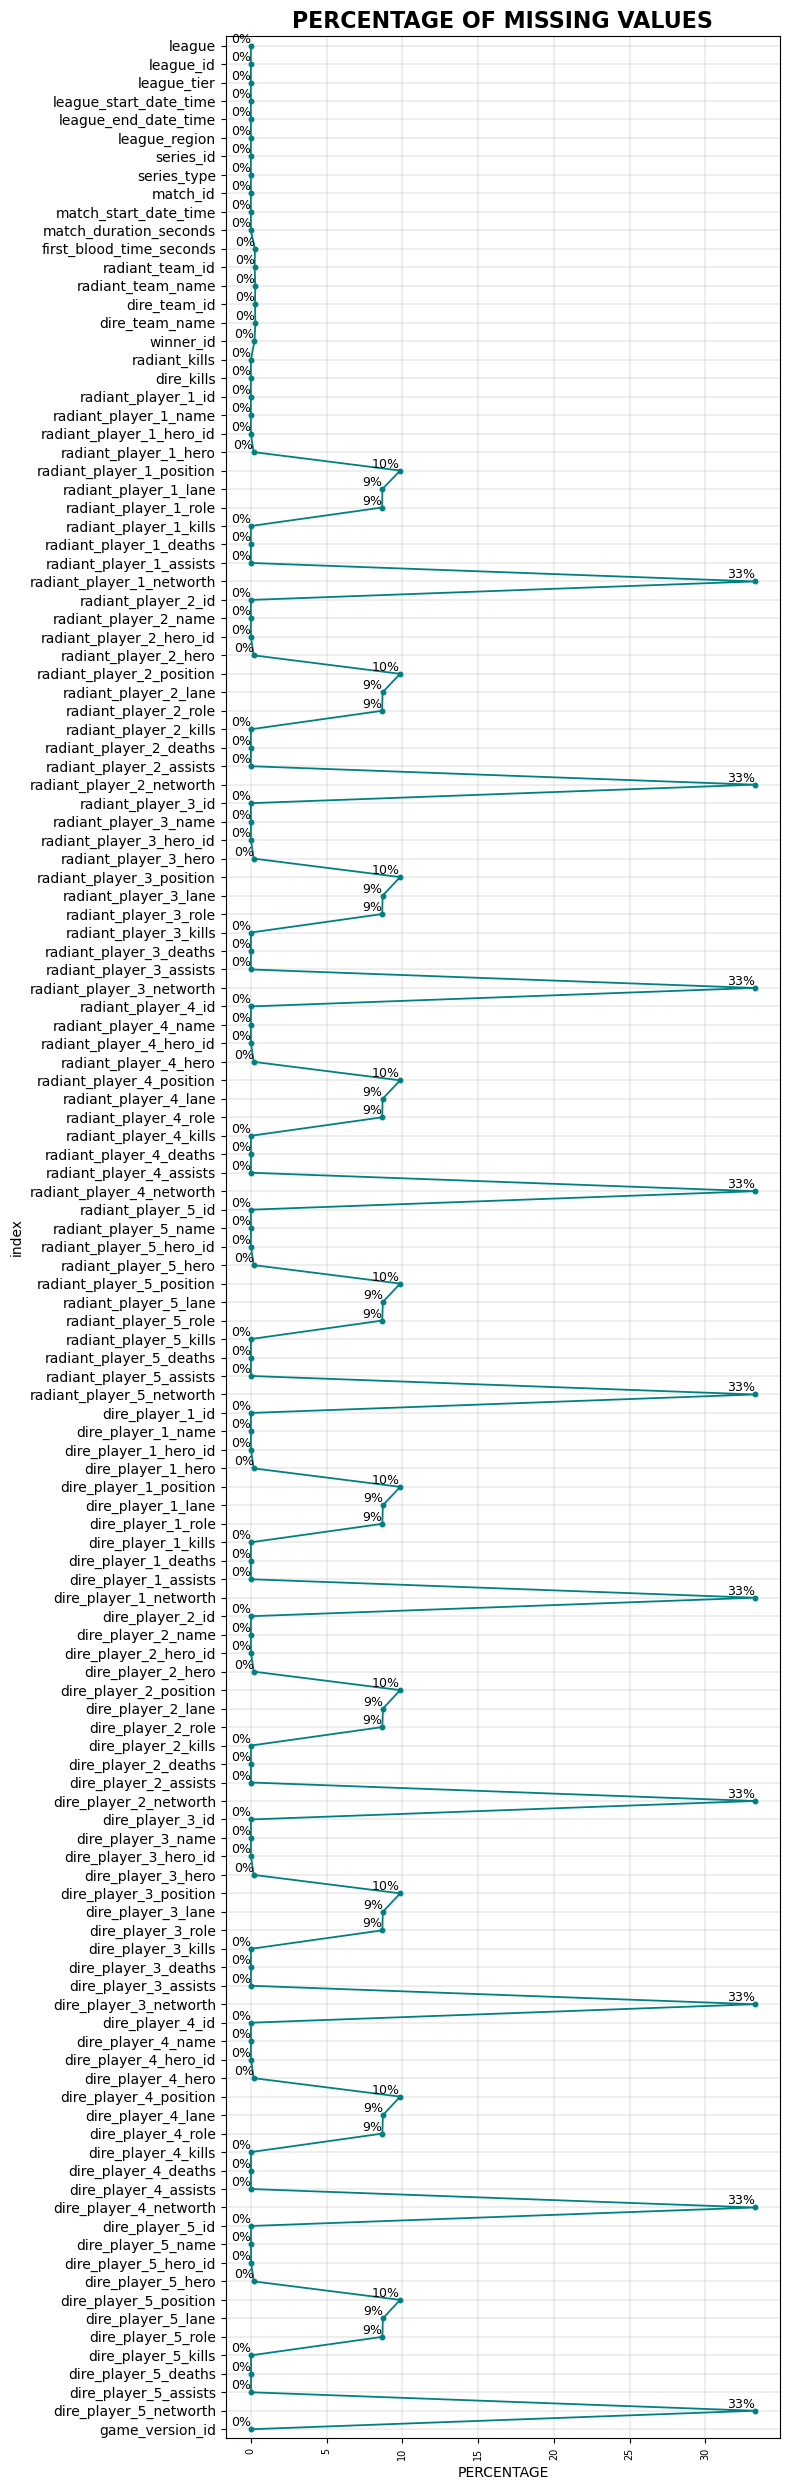

In [175]:
# check current missing values
get_missing_values()

* Notamos un patrón en las columnas donde falta revisar valores nulos, y es que tienen la misma cantidad, así que probablemente la solución para uno sea para todos, ya que probablemente compartan las filas donde hay nulos, así que compararemos específicamente las filas donde coincidan los nulos

In [202]:
# get columns with considerable amount of null values (e.g. +500)
current_null_cols = df.isna().sum()[df.isna().sum() > 5000].sort_values().index
current_null_cols

Index(['radiant_player_1_role', 'radiant_player_2_role',
       'radiant_player_3_role', 'radiant_player_4_role',
       'radiant_player_5_role', 'dire_player_1_role', 'dire_player_2_role',
       'dire_player_3_role', 'dire_player_4_role', 'dire_player_5_role',
       'radiant_player_1_lane', 'radiant_player_2_lane',
       'radiant_player_4_lane', 'radiant_player_3_lane',
       'radiant_player_5_lane', 'dire_player_3_lane', 'dire_player_1_lane',
       'dire_player_5_lane', 'dire_player_4_lane', 'dire_player_2_lane',
       'dire_player_3_position', 'dire_player_2_position',
       'radiant_player_5_position', 'dire_player_1_position',
       'radiant_player_2_position', 'radiant_player_1_position',
       'dire_player_4_position', 'dire_player_5_position',
       'radiant_player_3_position', 'radiant_player_4_position',
       'radiant_player_4_networth', 'radiant_player_3_networth',
       'dire_player_3_networth', 'dire_player_2_networth',
       'radiant_player_5_networth', 'dir

In [200]:
# validate if several columns have null values
df.loc[df['radiant_player_1_position'].isna(), current_null_cols]

,radiant_player_1_role,radiant_player_2_role,radiant_player_3_role,radiant_player_4_role,radiant_player_5_role,dire_player_1_role,dire_player_2_role,dire_player_3_role,dire_player_4_role,dire_player_5_role,...,radiant_player_4_networth,radiant_player_3_networth,dire_player_3_networth,dire_player_2_networth,radiant_player_5_networth,dire_player_1_networth,radiant_player_2_networth,radiant_player_1_networth,dire_player_4_networth,dire_player_5_networth
307,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,14601,17869,18713,22636,12780,41513,17718,25472,29849,12261
311,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,24469,18861,22102,14556,25933,19776,23019,10700,13677,20910
313,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,14738,29143,20277,21197,20951,15525,16144,23223,13732,8655
585,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,14607,8934,30314,12456,13042,19547,19086,12415,25227,12053
586,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,32017,30736,20025,9644,14133,10532,23702,21727,31777,21454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193541,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,15850,6890,21245,12150,12975,19645,5995,3195,14490,5565
193543,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,11905,11665,9215,10500,12515,9200,3575,10540,17120,14220
193544,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,5930,12760,10370,22700,1775,7065,3700,11405,11580,10730
193545,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,10325,19295,10200,11830,9875,9300,5550,7370,11550,23895


* Vemos que efectivamente muchas columnas están con valores nulos, así que las eliminamos

In [204]:
df = df.dropna(subset=['radiant_player_1_position'])

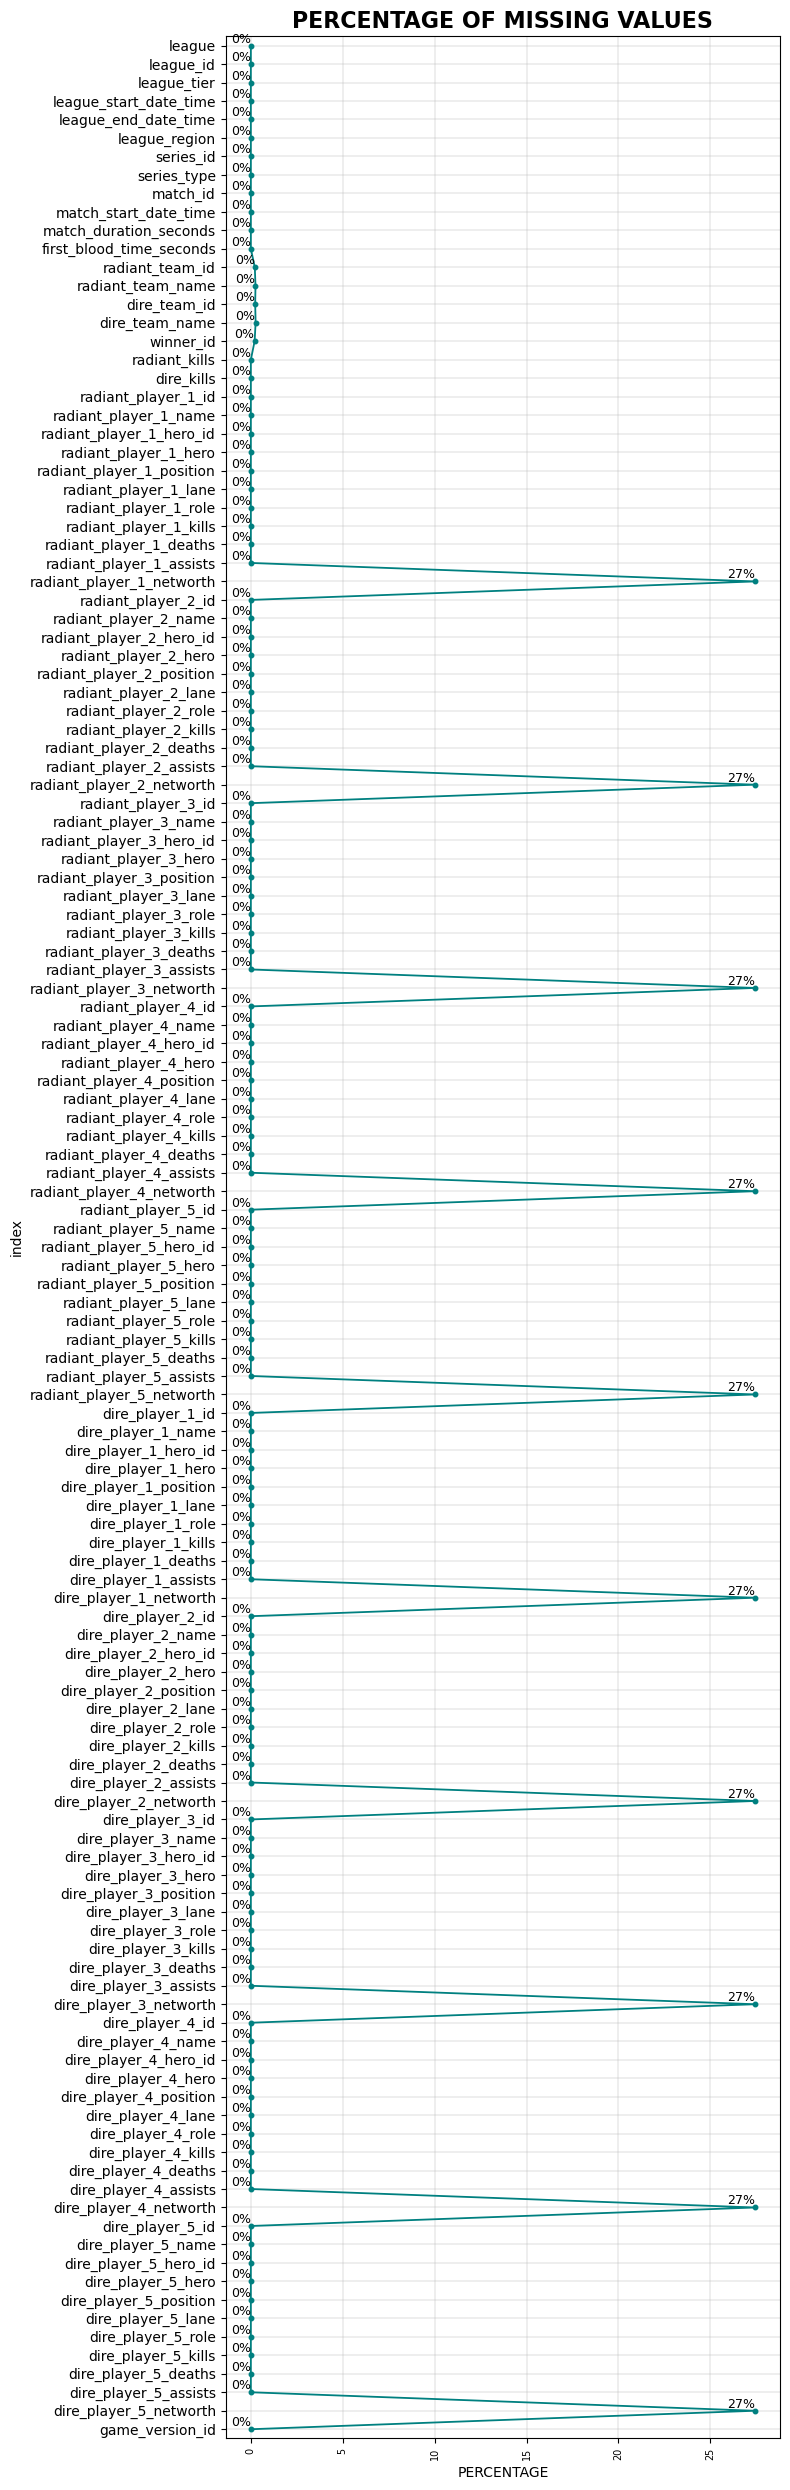

In [205]:
get_missing_values()

* Vemos que solo restaría revisar los nulos de las columnas "networth" de cada jugador. No podemos eliminarlas porque la cantidad es muy alta (27%) y además porque es una columna relevante, ya que la probabilidad de victoria/derrota muchas veces depende del networth. A pesar de no poder imputarla debido a que no tenemos los datos necesarios para ello, y aunque tampoco podamos rellenarlo con técnicas como usar la media, mediana, etc, vamos a mantenerla, ya que es una columna muy importante y se pueden sacar buenos análisis de ella cuando entremos a EDA

    * Notamos que olvidamos limpiar las filas de columnas que muy pocos valores nulos (-1%), así que lo haremos con el apoyo de AI Studio que nos da el código para identificar estas columnas (treshold de < 0.5%) y eliminarlas

In [214]:
# 1. Identifica las columnas con pocos NaNs restantes (ejemplo con < 0.5% del total)
total_rows = df.shape[0]
threshold = 0.005 # 0.5%
low_nan_cols = df.isna().sum()
low_nan_cols = low_nan_cols[(low_nan_cols > 0) & (low_nan_cols / total_rows < threshold)].index.tolist()

if low_nan_cols:
    print(f"Columnas con < {threshold*100}% NaNs: {low_nan_cols}")
    print(f"Número de NaNs en esas columnas:\n{df[low_nan_cols].isna().sum()}")

    # 2. Elimina las filas con NaNs en CUALQUIERA de esas columnas
    rows_before = df.shape[0]
    df_final_final = df.dropna(subset=low_nan_cols)
    rows_after = df_final_final.shape[0]

    print(f"\nFilas antes de eliminar NaNs menores: {rows_before}")
    print(f"Filas después: {rows_after}")
    print(f"Filas eliminadas: {rows_before - rows_after}")

    # A partir de aquí, usa df_final_final (o renómbralo a df)
    df = df_final_final.copy() # Hacer una copia si vas a modificarlo mucho en EDA
else:
    print("No se encontraron columnas con una cantidad muy pequeña (>0 y <threshold) de NaNs.")
    df = df.copy()


# Verifica que ya no quedan (o casi no quedan) NaNs
print("\nVerificación final de NaNs:")
print(df.isna().sum().sort_values(ascending=False).head(15)) # Muestra las 15 cols con más NaNs

Columnas con < 0.5% NaNs: ['first_blood_time_seconds', 'radiant_team_id', 'radiant_team_name', 'dire_team_id', 'dire_team_name', 'winner_id', 'radiant_player_2_name', 'radiant_player_4_name', 'radiant_player_5_name', 'dire_player_1_name', 'dire_player_2_name', 'dire_player_3_name', 'dire_player_4_name']
Número de NaNs en esas columnas:
first_blood_time_seconds      1
radiant_team_id             298
radiant_team_name           348
dire_team_id                326
dire_team_name              358
winner_id                   283
radiant_player_2_name         1
radiant_player_4_name         1
radiant_player_5_name         1
dire_player_1_name            2
dire_player_2_name            1
dire_player_3_name            2
dire_player_4_name            1
dtype: int64

Filas antes de eliminar NaNs menores: 138197
Filas después: 137520
Filas eliminadas: 677

Verificación final de NaNs:
radiant_player_4_networth    37239
radiant_player_1_networth    37239
dire_player_5_networth       37239
dire_play

* Volvemos a validar y ejecutamos el gráfico de valores faltantes agregando los decimales para validar que se realizó correctamente la limpieza de datos y estamos listos para empezar con EDA

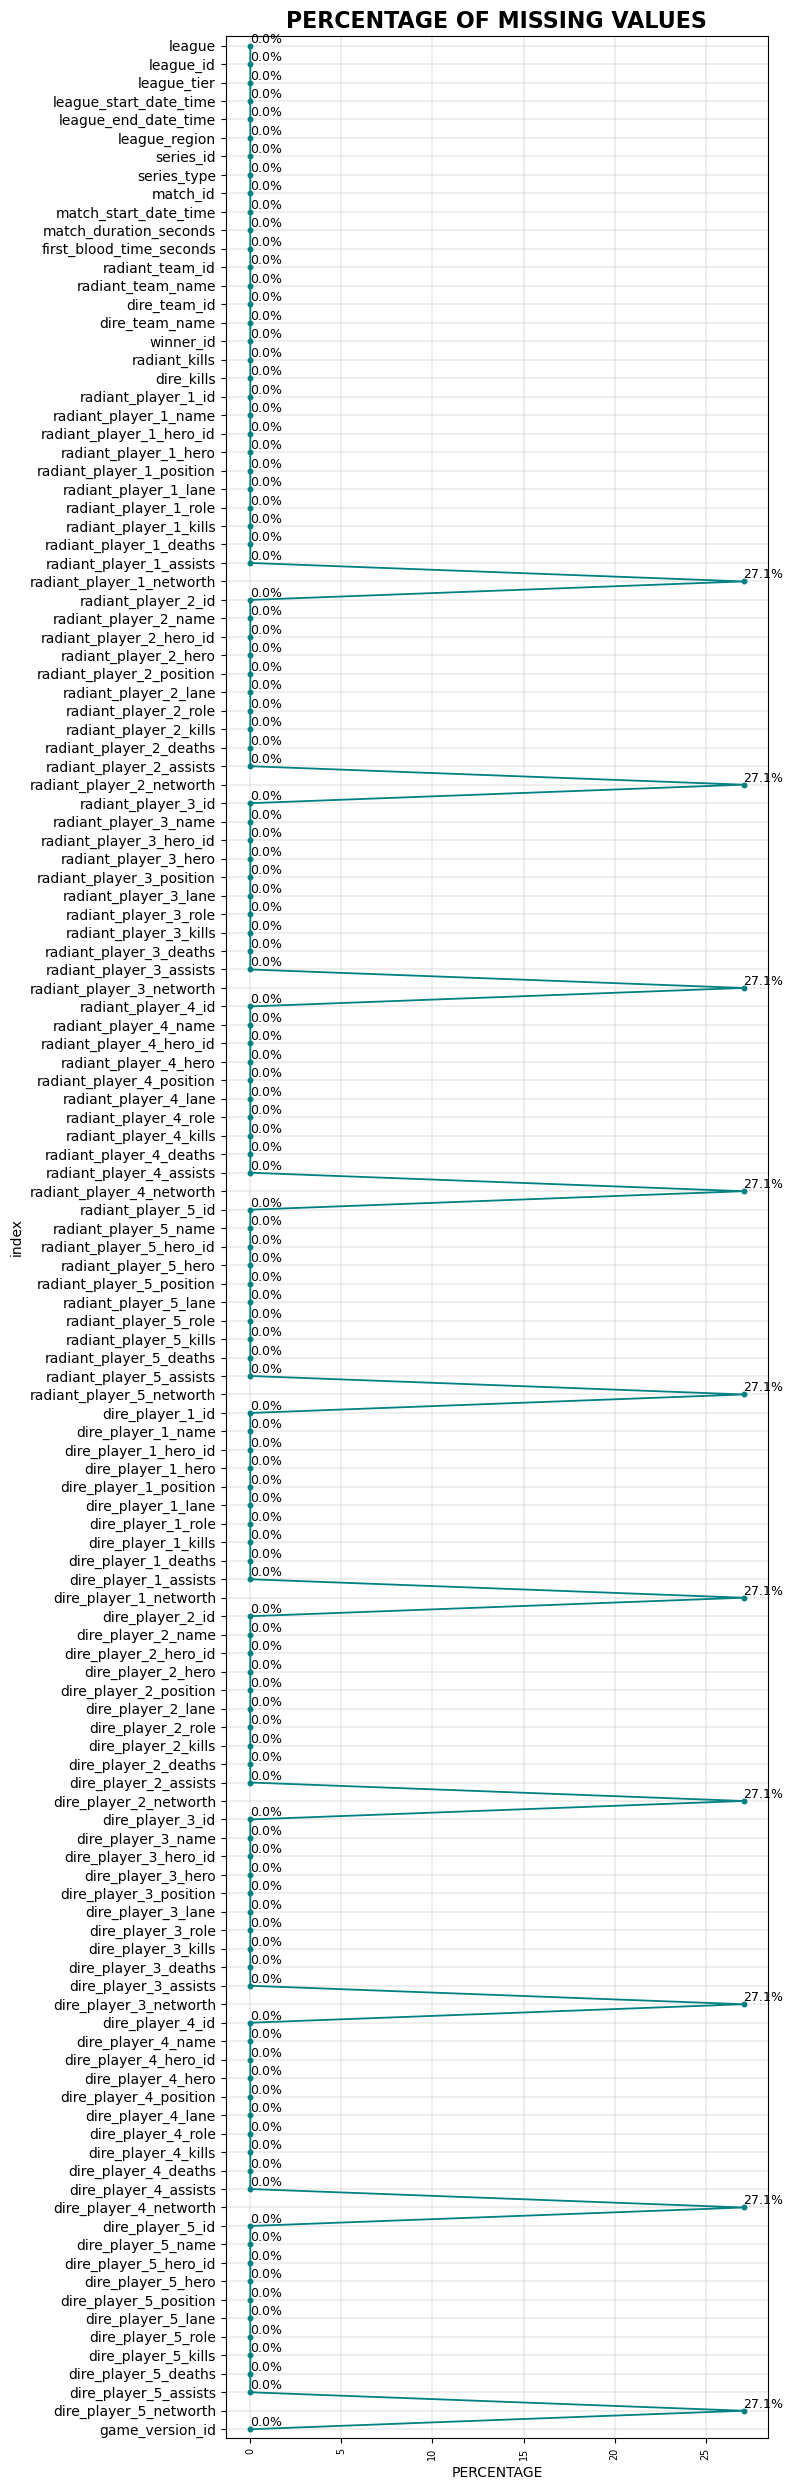

In [215]:
get_missing_values()

## SIGUIENTE PASO: EDA (2_eda.ipynb)